***
<h3>NUMERIC DIFFERENTIATION <h3/>
Differentiation with Symbolic Python 

***
    
#### OBJECTIVES ####
At the end of this unit,
1. students should be able to:  
    * Write simple mathematical expressions using symbolic manipulation in Python

    * evaluate mathematical expressions (substitution, factorisation and expansion methods) using symbolic manipulation in Python

    * evaluate the derivatives and integrals of mathematical expressions or functions using symbolic manipulation in Python
    * find the roots of an equation and solve simultaneous equations using symbolic manipulation in Python
    

2. students should also be able to write Python codes to solve numeric differentials using:
    
    * the Forward Difference method

    * the Backward Difference method  

    * the Central Diffference approximation
***




**Introduction to Symbolic Python**

First Let's import the library needed for using symbolic math in python and also, set up the notebook for printing

In [3]:
import sympy as smp

smp.init_printing()

We will then set variables x,y,z as symbols:

$$2x^2 + 3x + 5 $$

In [13]:
x = smp.Symbol('x')

y = 2*x**2 + 3*x - 5
a = y.factor()
a.expand()

In [14]:
x,y,z = smp.symbols('x,y,z')
x,y,z

In [23]:
expression = x**2 + 2*x - 5
expression.subs(x,'y**10')

In [8]:
import sympy as smp
x = smp.symbols('x')

y = x**2 + 2*x - 5

y.subs(x, 'y**2')


y**4 + 2*y**2 - 5

`Question 1: set an expression for the following:`
$$
x^2 + 2x -5
$$

Evaluate the expression for $x=1.5$. Also, make a variable substitution: $z$ for $x$. Do a variable substitution $y^2$ for $x$

In [3]:
#Here's the solution for x = 1.5

expression = x**2 + 2*x - 5

eva1 = expression.subs(x, 1.5)     
eva1

In [4]:
#Here's the solution for x = z
eva2 = expression.subs(x, z) 
eva2


In [5]:
#Here's the solution for x = y**2
eva3 = expression.subs(x, y**2)
eva3

`Question 2: Expand the following expression symbolically:`
$$
(x+1)^3(x-2)^2
$$

In [6]:
#Here's the solution
exp = (x+1)**3 * (x-2)**2

sp.expand(exp)

`Question 3: Factorize the following expression:`
$$
3x^4 - 36x^3 + 99x^2 - 6x -144
$$

In [7]:
#Here's the solution
exp = 3*x**4 - 36*x**3 + 99*x**2 - 6*x - 144
sp.factor(exp)

In [26]:
x,y = smp.symbols(('x','y'))
f = x*y*smp.exp(x*y)
print(f.diff(x,y),'\n', f.diff(x),'\n', f.diff(y))

(x**2*y**2 + 3*x*y + 1)*exp(x*y) 
 x*y**2*exp(x*y) + y*exp(x*y) 
 x**2*y*exp(x*y) + x*exp(x*y)


`Question 4: Compute the symbolic derivative:`
$$
\frac {d} {dx} sin^2(x)e^{2x}
$$

`Then evaluate the resulting expression for` $x = 3.3$

In [18]:
y = (smp.sin(x)**2) * (smp.exp(2*x))
y.diff().subs(x, 3.3)

265.596339800896

In [50]:
#First let's assign the expression to y
y = (sp.sin(x))**2 * sp.exp(2*x)

#Perform the derivative of the expression y w.r.t x
der = sp.diff(y,x)
der

In [53]:
der.subs(x,3.3)

`Question 5: Create a sympy expression representing the following integral:`
$$
\int_{0}^{5} x^2sin(x^2)dx
$$

`Then evaluate the integral symbolically`

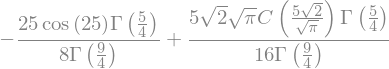

In [8]:
y = x**2 * sp.sin(x**2)

integral = sp.integrate(y,(x,0,5))
integral

`Question 6: Solve for the roots of the following equation:`
$$
x^3 + 15x^2 = 3x - 10
$$

Use the `Eq` and `solve` functions and save as an expression. Show the expression (It will be a list). Then find the numerical value of each root using the `evalf` function. You can use `evalf` on some expression using `my_expression.evalf()`

In [14]:
#Here's how to write and show the expression
y = sp.Eq(x**3+15*x**2, 3*x-10)
y

In [28]:
y = sp.Eq(x**2+5*x-6,0)
z = sp.solve(y,x)
z

In [24]:
z[1].evalf()

`Question 7: Solve the system of three equations in three unknowns symbolically:`
$$
x+y+z = 0\\
2x-y-z = 10\\
y+2z = 5
$$

Compare the result to the answer computed with `fsolve` from `scipy.optimize`

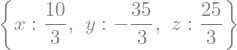

In [72]:
#Using the symbolical method:

x,y,z = sp.symbols('x,y,z')

eq1 = sp.Eq(x+y+z, 0)
eq2 = sp.Eq(2*x-y-z, 10)
eq3 = sp.Eq(y+2*z, 5)

sp.solve([eq1, eq2, eq3], (x,y,z))

In [13]:
#Using Scipy

from scipy.optimize import fsolve

def f(w):
    x = w[0]
    y = w[1]
    z = w[2]
    
    f1 = x+y+z
    f2 = 2*x-y-z-10
    f3 = y+2*z-5
    
    return [f1,f2,f3]

result = fsolve(f,[0,0,0])
result

array([  3.33333333, -11.66666667,   8.33333333])

`Problem : Solve the following differential equation symbolically using the` *dsolve* `function:`
$$
\frac{df(x)}{dx} = xcos(x)
$$

**Overview of numeric differentiation**

The opposite of a numerical integral is a numerical derivative.
The 'sonic ranger' is one of the tools commonly used in an introductory physics laboratory. It uses pulses of sound to determine the distance between a sensor and some object, typically a dynamics cart. This instrument measures distance only, however, we would like to calculate the velocity and acceleration as well.
This is where numeric differentiation becomes useful.

#### Forward Difference method ####

The standard definition of a derivative, the one you see in the calculus books, is 

$$
 \frac{df}{dx} = lim_{h->0} \frac{f(x+h) - f(x)}{h}
$$

The basic method for calculating numerical derivatives is precisely an implementation of this formula. We can’t take the limit h → 0 in practice, but we can make h very small and then calculate

$$
\frac{df}{dx} \approx \frac{f(x+h) - f(x)}{h}
$$

This approximation to the derivative is called the forward difference, because it’s measured in the forward (i.e., positive) direction from the point of interest $x$. You can think of it in geometric terms as shown in the figure below —it’s simply the slope of the curve $f(x)$ measured over a small interval of width $h$ in the forward direction from $x$.



Now check out this example:

`Example 3.3.1 : Use a forward difference, and the values of h shown, to approximate the derivative of` $cos(x)$ `at` $x = π/3$. (a) $h = 0.1$, (b) $h = 0.01$, (c) $h = 0.001$, (d) $h = 0.0001$`. Work to 8 decimal places throughout. Here's how to do so:`

In [1]:
import sympy as sp

In [2]:
x = sp.Symbol('x')
x

x

In [5]:
f = sp.cos(x)
f.diff()

-sin(x)

In [6]:
import sympy as smp

#sp.init_printing()
x = smp.Symbol('x')

def forw_diff(fn, y, h):
    p = fn.subs(x, y+h)
    n = fn.subs(x, y)
    
    f_diff = round((p-n)/(h), 8)
    
    return (p-n)/(h) #f_diff


#Let's define our function:

Fx = smp.cos(x)

H1 = forw_diff(Fx, smp.pi/3, 0.1)     #For h = 0.1
H2 = forw_diff(Fx, smp.pi/3, 0.01)     #For h = 0.01
H3 = forw_diff(Fx, smp.pi/3, 0.001)     #For h = 0.001
H4 = forw_diff(Fx, smp.pi/3, 0.00001)     #For h = 0.0001

print('The exact value is: ', round(smp.diff(smp.cos(x)).subs(x, smp.pi/3), 8))
print()
print('Here are the forward difference values:')
print()
print('(a) = ',float(H1))
print('(b) = ' ,float(H2))
print('(c) = ',float(H3))
print('(d) = ',float(H4))



The exact value is:  -0.86602540

Here are the forward difference values:

(a) =  -0.8895619232373657
(b) =  -0.8685109492666137
(c) =  -0.8662752594260452
(d) =  -0.8660279037700048


([<matplotlib.axis.XTick at 0x222238d56a0>,
 [Text(0, 0, '0'),
  Text(90, 0, '90'),
  Text(180, 0, '180'),
  Text(270, 0, '270'),
  Text(360, 0, '360')])

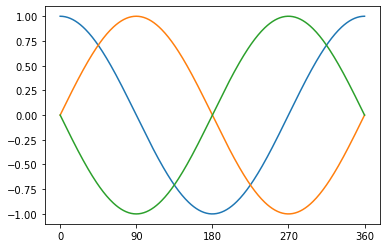

In [20]:
import numpy as np
import matplotlib.pyplot as plt
a = np.arange(0,361)

plt.plot(a, np.cos(np.deg2rad(a)))
plt.plot(a, np.sin(np.deg2rad(a)))
plt.plot(a, -np.sin(np.deg2rad(a)))

plt.xticks(a[::90],a[::90])

In [29]:
Fx = smp.cos(x)
float(Fx.diff().subs(x, smp.pi/3))

In [37]:
float(H4)

One advantage of doing a simple example first is that we can compare these approximations with
the ‘exact’ value which is

$f'(a) = sin(\frac {\pi}{3}) = -0.86602540  $ to 8 d.p. 

Note that the accuracy levels of the four approximations in this example (3.3.1) are:

(a) 1 d.p. (b) 2 d.p. (c) 3 d.p. (d) 3 d.p. (almost 4 d.p.)

The errors to 6 d.p. are:

(a) 0.023537 (b) 0.002486 (c) 0.000250 (d) 0.000025

Notice that the errors reduce by about a factor of 10 each time.

#### Backward Difference method

There is also the backward difference, which has the mirror image definition

$$
\frac{df}{dx} \approx \frac{f(x) - f(x-h)}{h}
$$

The forward and backward differences typically give about the same answer and in many cases you can use either. Most often one uses the forward difference. There are a few special cases where one is preferred over the other, particularly when there is a discontinuity in the derivative of the function at the point $x$ or when the domain of the function is bounded and you want the value of the derivative on the boundary, in which case only one or other of the two difference formulas will work. The rest of the time, however, there is little to choose between them.

<img src="img/num_diff4.jpg" />

*Note: Before using either the forward or backward difference we must choose a value for $h$. To work out what the best value is we need to look at the errors and inaccuracies involved in calculating numerical derivatives.*


#### Errors ###
Calculations of derivatives using forward and backward differences are not perfectly accurate. There are two sources of error. The first is the rounding error and the second is the approximation error that arises because we cannot take the limit $h → 0$, so our differences are not really true derivatives. 

The error on our derivative may be given as:

$$
\epsilon = h\left\lvert {f''(x)} \right\rvert \sqrt{4C\left\lvert {f(x) f''(x)}\right\rvert}
$$

#### Central Difference method ####
The central difference is similar to the forward and backward differences, approximating the derivative using the difference between two values of $f(x)$ at points a distance $h$ apart. What’s changed is that the two points are now placed symmetrically around $x$, one at a distance $\frac {h}{2}$ in the forward (i.e., positive) direction and the other at a distance $\frac {h}{2} $ in the backward (negative) direction.

$$
\frac{df}{dx} \approx \frac{f(x+h/2) - f(x-h/2)}{h}
$$

To calculate the approximation error on the central difference we write two Taylor expansions:

$$
\begin{align}
f(x+h/2) = f(x) + \frac{1}{2}h f'(x) + \frac{1}{8}h^2 f''(x) + \frac{1}{48}h^3 f'''(x) + ...\tag{1} \\
f(x-h/2) = f(x) - \frac{1}{2}h f'(x) + \frac{1}{8}h^2 f''(x) - \frac{1}{48}h^3 f'''(x) + ...\tag{2}
\end{align}
$$

Subtracting the second expression from the first and rearranging for $f′(x)$, we get:

$$
f'(x) = \frac{f(x+h/2) - f(x-h/2)}{h} - \frac{1}{24}h^2 f'''(x)+...
$$

The optimal error in this case is:

$$
\epsilon = \frac {1}{8}h^2\left\lvert {f'''(x)} \right\rvert = ( \frac {9}{8}C^2 \left\lvert {f(x)} \right\rvert^2 \left\lvert {f'''(x)}\right\rvert ) ^3
$$


`Example 3.3.2: Create a user-defined function `$f(x)$` that returns the value` 

$$
1 + \frac{1}{2} tanh 2x ,
$$

`then use a central difference to calculate the derivative of the function in the range` $−2 ≤ x ≤ 2$.

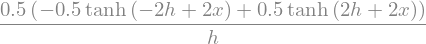

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline

sp.init_printing()

x,h = sp.symbols('x,h')

def centr_der(fn, y, h):
    
    p = fn.subs(x, y+h)
    n = fn.subs(x, y-h)
    
    c_der = (p-n)/(2*h)
    
    return c_der#.evalf()


Fx = 1 + 1/2 * sp.tanh(2*x)

ans = centr_der(Fx, x, h)
ans.evalf()

In [9]:
#Now let's input the various values of x in the expression(ans):

cen_ans = [] #create an empty list
#x_val = []

for i in (range(-2,3)): # loop through the range -2 <= x <= 2 in steps of 1
    #Let h = 1
    #x_val.append(i)
    ans = centr_der(Fx, i, 1).evalf()  # Calculate the derivative for every x=i and h=1 values
    
    cen_ans.append(ans)  #Append every value or answer to or store them in the list

print(cen_ans) #print final answer for every x=j value


#plt.plot(x_val, cen_ans)

[0.00899003289374467, 0.249832324934767, 0.482013790037908, 0.249832324934767, 0.00899003289374467]


`Example 3.3.3:The distance `$x$` of a runner from a fixed point is measured (in metres) at intervals of half a second. The data obtained are` ![Example 3.3.3 table](num_diff_tab_data.jpg)

`Use central differences to approximate the runner’s velocity at times `$t = 0.5 s$ ` and`
 $t = 1.25 s$`. Let's write a code to solve this:`

In [141]:
#We first create the table of data/values using pandas DataFrame
import pandas as pd
dis_vel = pd.DataFrame ([[0.0, 0.00],[0.5, 3.65], [1.0,6.80], [1.5, 9.90],[2.0, 12.15]],
                        columns=['t','x'])

#Let's transpose the table to look like what we have in the question
dis_vel = dis_vel.set_index(['t']).T 
dis_vel

t,0.0,0.5,1.0,1.5,2.0
x,0.0,3.65,6.8,9.9,12.15


In [177]:
'''
Next is to define a function that uses the central difference approach to calculate
the runner's velocity (derivative of distance (x) w.r.t time (t))
to do this we need:

x = time, t in seconds

h = time interval between given time period and the next available or previous time
The choice of h is dictated by the available data given in the table

'''
def derx_t(t, h):
    a = (t+h)
    b = (t-h)
    
    der = dis_vel.at['x', a]- dis_vel.at['x', b]
    der = der/(2*h)
    return der

#For time t = 0.5 s: t= 0.5 and h = 0.5
print('Data centered at t = 0.5 s at its centre we obtain: ',derx_t(0.5, 0.5), 'm/s')


#For time t = 1.25s: t= 1.25 and h = 0.25
print('Data centred at t = 1.25 s gives us the approximation: ', round(derx_t(1.25, 0.25),2), 'm/s')


Data centered at t = 0.5 s at its centre we obtain:  6.8 m/s
Data centred at t = 1.25 s gives us the approximation:  6.2 m/s


***
<h3>NUMERIC INTEGRATION <h3/>

***
    
#### OBJECTIVES ####
At the end of this unit, students should be able to write python codes to solve numeric integrals using:

* the simple method 
    
* the trapezoid method or rule 
    
* the Simpson's method or rule 
    
***
    
    
<img src="img/Int.jpg" />
    
Consider the function shown in the figure above, depending on the functional form of 
$f(x)$, it may not be possible to calculate the integral of $f$ from $a$ to $b$ analytically.

The integral of $f(x)$ from $a$ to $b$ is the area under the curve, though, which leads to the earliest numeric method of estimating that integral.

# Simple Method #

The simplest method of estimating the integral shown in figure 2.5 above is to divide the integration range into $N$ slices of width $dx$. Calculate the value of $f(x_i)$ at some point on each slice, and find the area $A_i = f(x_i)\Delta x$ for each slice, as shown in this figure: 

<img src="img/Int1.png" /> 

The integral is then approximately: 
$$
\int_{a}^{b} f(x)dx \approx \sum_i {f(x_i)}\Delta x
$$


#### Calculating the integral of a function $f(x)$

1. First we find a way to define the function $y$ or $f(x)$ that we want to integrate. For example, assuming the function we want to integrate is $x^3 + 2x$. In other words $y = f(x) = x^3 + 2x$. Then we can write the function as:


In [90]:
'''
Here we define a function named f which takes any value x,
computes the cube of this value x, adds it to 2 times the value of x and returns an answer or solution
'''
def f(x):
    return x**3 + 2*x

'''
We can then call this function anytime given any value of x, so it computes and returns an answer 
after solving (x**3 + 2*x)

Here's an example using this function to solve for x = 1, 2 and 3:

'''

print('for x = 1, f(x) =', f(1)) 

print('for x = 2, f(x) =', f(2))

print('for x = 3, f(x) =', f(3))

for x = 1, f(x) = 3
for x = 2, f(x) = 12
for x = 3, f(x) = 33


2. The next thing we will do is to define our limits of integration, $a =$ lower limit and $b =$ upper limit, the number of slices, $N$ of width, $dx = \frac {b-a}{N}$. So, assuming we want to integrate the function above ($f(x) = x^3 + 2x$) over the limits a = 0 and b = 4, with N = 20 slices, then $dx = \frac {b-a}{N} = \frac {4-0}{20} = \frac {4}{20} = 0.2$ 

In [91]:
a = 0; b = 4; N = 20

dx = (b-a)/N

dx

0.2

3. We can then define a range of values of $x$ from point $a=0$ to $b=4$ over $N=20$ slices, compute the area for each slice and sum the area values under the function $f(x) = x^3 + 2x$ over $[a=0,b=4]$. The sum of these values equals the integral value of the function  as demonstrated below:

In [92]:
I = 0
for j in range(N):
    x = a + dx * j
    '''
    Note that the final point f(4) is not included as range is from 0 - 19 (20 slices) 
    Hence x has values in the set {0, 0.2,..., 3.6, 3.8}
    '''
    area = f(x)*dx  #Calculate the area for each slice
    I = I + area     #sum of all the area values under the function f(x) over [a=0,b=4]
    integral = I     #Integral equals the sum of all the area values

print(round(integral, 2))    #Display our final answer


72.96


Now for this same function let's increase the number of slices from 20 to 100. ie $N=100$ and integrate the function over $N=100$ slices:

In [93]:
def f(x):
    return x**3 + 2*x

a = 0; b = 4; N = 100

dx = (b-a)/N

I = 0
for j in range(N):
    x = a + dx * j
    
    area = f(x)*dx  #Calculate the area for each slice
    
    I = I + area     #sum of all the area values under the function f(x) over [a=0,b=4]
    
    integral = I     #Integral equals the sum of all the area values

print(round(integral,2))    #Display our final answer


78.57


Comparing the integral values obtained for $N=20$ slices **(72.96)** and $N=100$ slices **(78.57)** to the exact value of :
$$
\int_{0}^{4} f(x^3 + 2x)dx = 80
$$

The accuracy of the approximation increases as number of slices, $N$ increases (higher values of $N$).

`A python implementation of the simple integration method could look something like this:`

In [95]:
def int_simple(fn, a, b, N):
    '''
    A routine to do a simple rectangular−slice approximation of an integral.
    fn: the function to integrate
    a,b: lower and upper limits of integration respectively
    N: number of slices to take
    
    '''
    I = 0
    dx = (b-a)/float(N)
    for j in range(N):
        x = a + dx * j
        area=fn(x)*dx        #Calculate the area for each slice
        I = I + area         #sum of all the area values under the function f(x) over [a=0,b=4]
        integral = I         #Integral equals the sum of all the area values
    return integral          #Returns the final Integral value

`Example 3.2.1: Assuming we want to find the integral of a function` $f(x) = cos(x)$ `with limits of integration a (lower limit) = 1 and b (upper limit) = 4 over` $N = 20$ `slices, then the python program is: `

In [96]:
from math import *
int_cos_x = int_simple(cos, 1, 4, 20)
print(int_cos_x)

-1.5057296484473184


`Example 3.2.2: Here's a simple program to calculate the integral of` $sin(x)$ `from 0 to pi:`

In [97]:
def int_simple1(f,dx) :
    """
    Simplest integration possible, using uniform rectangular slices. 
    This gives a rather poor result, with the error on the order of dx.
    f [ ] should be a list of function values at x values separated by the interval dx.
    The limits of integration are x [0] −> x [ 0 ] + dx ∗ len(f).

    Note that this algorithm deosn't use the last point in f!
    """

    return dx*sum (f[0:-1]) #The sum() function is built−in, and does exactly what you would expect.



from math import *

N = 100           #Higher N gives better results.
a = 0.0
b = pi
interval = (b-a) / float(N)


x = [a + interval * i for i in range(N+1)]        #Calculate the values of x to use .

#notice that it takes N+1 function values to define N slices!


FunctionValues = [sin(value) for value in x]                 #Calculate the values of f(x)

print (f'The value of the integral is approximaely: {int_simple1(FunctionValues, interval)}')

The value of the integral is approximaely: 1.9998355038874436


**NOTE:**
This simple method makes use of the Riemann sums, an approximation of a definite integral.

Let's write a function called `riemann_sum` which takes 5 input parameters `f, a, b, N` and `method` and returns the Riemann sum:

In [99]:
import numpy as np
def riemann_sum(f,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a , b : numbers
        Endpoints of the interval [a,b]
    N : integer
        Number of subintervals of equal length in the partition of [a,b]
    method : string
        Determines the kind of Riemann sum:
        right : Riemann sum using right endpoints
        left : Riemann sum using left endpoints
        midpoint (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")
        
        
#riemann_sum(f,0,4,20)   

`Problem: Use the Riemann sum function defined above to approximate:`
$$
\int_{0}^{\frac {\pi}{2}} sin(x) dx
$$

`using all three methods for` $N=100$ `slices. Compute the exact value and compare your approximations with the exact value. State the error of approximation for each method.`

### Trapezoid Method ###

We can greatly improve the efficiency of our integration by approximating the slices as trapezoids instead of as rectangles, as shown in the figure below.
<img src="img/trap.jpg" />

<img src="img/equ2.png" />

This is probably the most efficient way to code the trapezoid method, although the actual function is left as an exercise.


`Example 3.2.3:
Let us use the trapezoidal rule to calculate the integral of` $ x^4 − 2x + 1$ `from
x = 0 to x = 2. This is actually an integral we can do by hand, which means
we don’t really need to do it using the computer in this case, but it’s a good
first example because we can check easily if our program is working and how
accurate an answer it gives.Here is a program to do the integration using the trapezoidal rule with N = 10 slices:`

In [6]:
def f(x):
    return x**4-2*x+1


N = 10
a = 0; b = 2
h = (b-a)/N

trap = 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    trap += f(a+k*h)
    
print(h*trap)

4.50656


This is a straightforward translation of the trapezoidal rule formula into computer code: we create a function that calculates the integrand, set up all the
constants used, evaluate the sum for the integral I (a, b) term by term, and then
multiply it by h and print it out.
The correct answer is:
![trapezoidal rule eg1](trap_eg.jpg)
So our calculation is moderately but not exceptionally accurate—the answer is
off by about 2%.

We can make the calculation more accurate by increasing the number of
slices, N.

`Example 3.2.4: In this example, let's first create a pandas DataFrame which contains two columns of numbers, the first representing time, t in seconds and the second the x-velocity in meters per second of a particle, measured once every second from
time` $t = 0$ ` to` $t = 10$ `. We'll then write a program to do the following:`

`a) using the trapezoidal rule, calculate from this data the approximate distance traveled by the particle in the x direction as a function of time.`

`b) Extend our program to make a graph that shows, on the same plot, both the
original velocity curve and the distance traveled as a function of time.`

  time, t (s)    x-velocity (m/s)    Distance (m)
-------------  ------------------  --------------
            0            0             nan
            1            0.069478        0.203499
            2            0.137694        0.278125
            3            0.204332        0.327587
            4            0.269083        0.362401
            5            0.331656        0.38745
            6            0.341561        0.35348
            7            0.399991        0.372283
            8            0.420132        0.355724
            9            0.481123        0.373953
           10            0.600344        0.43151


<AxesSubplot:xlabel='time, t (s)'>

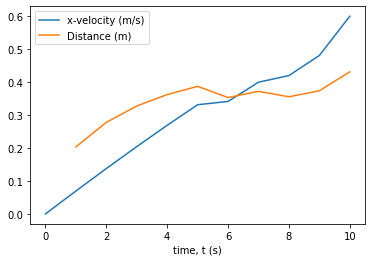

In [8]:
import pandas as pd
import numpy as np
from tabulate import tabulate
vel_table = np.array([[0, 0],[1, 0.069478],[2, 0.137694],
             [3, 0.204332], [4, 0.269083], [5, 0.331656], [6, 0.341561], [7, 0.399991],
            [8, 0.420132], [9, 0.481123], [10, 0.600344]])
#print(tabulate(vel_table))
vel_table = pd.DataFrame(vel_table, columns=['time, t (s)', 'x-velocity (m/s)'])

##type(vel_table)
#vel_table = vel_table.set_index(['time, t (s)'])
#vel_table.loc[0:5]
m = vel_table.loc[:,'time, t (s)']
n = vel_table.loc[:, 'x-velocity (m/s)']

def vel_fn(x,t):
    return x/t


N = 10
a = 0; b = 10
h = (b-a)/N

trap = 0.5*vel_fn(n,m) + 0.5*vel_fn(n,m)

for k in range(1,N):
    trap += vel_fn(n,m+k*h)
    

d_vals = h*trap
#d_vals= pd.DataFrame(d_vals)
vel_dist_table = vel_table['Distance (m)'] = d_vals 
vel_dist_table = vel_table
z = vel_dist_table.set_index(['time, t (s)'])
print(tabulate(z, headers=('time, t (s)', 'x-velocity (m/s)', 'Distance (m)')))
z.plot()

*`Probem (Trial) 3.2.1: Write a program that uses the trapezoidal method to return the integral of a function over a given range, using a given number of sample points. The actual calculation should be a function of the form int_trap (f,dx), where f is a list of function values and dx is the slice width.`*

### The Simpson's Method ###


Simpson's Rule, named after the English mathematician Thomas Simpson (1710 - 1761),  is a numerical method that approximates the value of a definite integral by using quadratic functions.

Simpson's Rule is based on the fact that given three points, we can find the equation of a quadratic through those points. To obtain an approximation of the definite integral 
$$
\int_{a}^{b} f(x)dx
$$
using Simpson's Rule, we partition the interval $ [a,b] $ into an even number $n$ of subintervals, each of width:

$$
\Delta {x} = \frac {(b-a)}{n}
$$

On each pair of consecutive subintervals $[x_i - 1, x_i], [x_i, x_i + 1]$ ,we consider a quadratic function $ y = ax^2 + bx + c $
 
 such that it passes through the points $ [x_i - 1,f(x_i-1)], [x_i,f(x_i)], [x_i + 1,f(x_i+1)] $
<img src="img/simp.jpg" />
if the function $ f(x)$ is continuous on $ [a, b]$ , then 
$$
\int_{a}^{b} f(x)dx \approx \frac {\Delta{x}} {3} [ f(x_0) + 4 f(x_1) + 2f(x_2) + 4f(x_3)+ 2f(x_4) + ... + 4f(x_{n-1}) + f(x_n)]
$$

`Example 3.2.5: A Simpson’s method integration function is shown in this example:`



In [10]:
def int_simpson(f,dx):
    """
    Simpson's rule, using uniform slices. f[] should be a list of function values, separated on the x-axis by
    the interval dx. The limits of integration are x[0] −> x [ 0 ] + dx ∗ len(f)
    
    This particular algorithm doesn't require that there be an even number of intervals (odd number of points):
    instead, it adds the last section separately if necessary.
    """
    N=len(f) # number of points
    
    integral = 0.0 #initial value of integral
    
    for i in range (1, N-1, 2):
        integral = integral + f[i-1] + 4.0*f[i] + f[i+1]  #add up terms
        
    integral = integral * dx / 3.0
    
    if (N % 2) == 0:
        integral = integral + dx * (5.0*f[-1] + 8.0*f[-2] - f[-3])/12.0
        
    return integral
  

c =[0,2,4,6,8]
int_simpson(c, 2) 

32.0

`Example 3.2.6 : Use the Simpson's method with` $n = 4$ `to approximate the integral`

$$
\int_{0}^{8} \sqrt{x}dx
$$
    
`Let's see the solution here:`

In [13]:
'''
Let's define a function (Simp_int) that uses the Simpson's rule to integrate a function, Fn
from lower limit a, to upper limit b with n subintervals
'''

def simp_int(Fn, n, a, b):      
    dx = (b-a)/n
    Fn_val = []
    i_val = []
    from numpy import arange
    for i,j in enumerate(arange(a, (b+dx), dx)):
        Fx = Fn(j)
        Fn_val.append(Fx)
        i_val.append(i)
    
        if (n == 2):
            if i == 0:
                integral = Fn_val[i]
            elif i == 1:
                integral = integral + 4 * Fn_val[i]
            else :
                integral = integral + Fn_val[i]
                
        if (n == 4):
            if i == 0:
                integral = Fn_val[i]
            elif i == 1:
                integral = integral + 4 * Fn_val[i]
            elif i == 2:
                integral = integral + 2 * Fn_val[i]
            elif i == 3:
                integral = integral + 4 * Fn_val[i]
            else :
                integral = integral + Fn_val[i]
        
        if (n == 6):
            if i == 0:
                integral = Fn_val[i]
            elif i == 1:
                integral = integral + 4 * Fn_val[i]
            elif i == 2:
                integral = integral + 2 * Fn_val[i]
            elif i == 3:
                integral = integral + 4 * Fn_val[i]
            elif i == 4:
                integral = integral + 2 * Fn_val[i]
            elif i == 5:
                integral = integral + 4 * Fn_val[i]
            else :
                integral = integral + Fn_val[i]
    integral = integral * dx / 3.0

    #integral = (Fn_val[0]+ 4 * Fn_val[1] + 2 * Fn_val[2] + 4 * Fn_val[3]+ Fn_val[4])*dx/3   
        
    return integral



'''
Note that in this case:
Fn = Sqrt(x)
n = number of subintervals = 4
a = lower limit = 0
b = upper limit = 2
'''

#Now let's call our defined simpson's integral function on our function to be integrated

simp_int(sqrt,4,0,8)


14.855493563580856

`Example 3.2.7. Now let's look at another example:`

Approximate the integral :
$$
\int_{1}^{2} \frac {dx}{x}
$$

using Simpson's Rule with $n = 2$ subintervals.

In [14]:
#First let's define our main function to be integrated (1/x) as:

def fn_1(x):
    fn_1 = 1/x
    return fn_1

'''
Note that in this case:
Fn = 1/x
n = 2
a = 1
b = 2
'''
#Now let's call our defined simpson's integral function on our function to be integrated

simp_int(fn_1, 2, 1, 2 )


0.6944444444444443

`Example 3.0.9: A function` $f(x)$ `is given as a table of values. Approximate the area under the curve` $y = f(x)$ `from` $x = -4$ `and` $x = 8$ `using Simpson's Rule with` $n = 6$ `subintervals.`
<img src="img/simp_eg3.jpg" />
`Here's the solution:`

In [16]:
'''
Note that our work becomes easier since the table of values have already been given.
We straightforward substitute our values into the Simpson's formula
'''
a = -4 ; b =8

dx = (8-(-4))/6

#(f(x=0)+ 4f(x=1) + 2f(x=2) + 4f(x=3) + 2f(x=4) + 4f(x=5) + f(x=6)) * dx/3

int_sum  =(1 + 4*3 + 2*4 + 4*4 + 2*6 + 4*9 + 14)
ans = int_sum * dx/3
print('The area under the curve y = f (x) is :', ans)

The area under the curve y = f (x) is : 66.0


### Problems (Trials) ###

*`Probem (Trial) 3.2.1: Write a program that uses the trapezoidal method to return the integral of a function over a given range, using a given number of sample points. The actual calculation should be a function of the form` $int_trap (f,dx)$ `, where` $f$ `is a list of function values and` $dx$ `is the slice width.`*


*`Problem (Trial) 3.2.2: Find out other methods of numerical integration.`*


*`Problem (Trial) 3.2.3: A function` $f(x)$ `is given by the table of values. Approximate the area under the curve` $y = f (x)$ `between` $x = 0$ `and` $x = 4$ `using Simpson's method with` $n = 4$ `subintervals`*
<img src="img/prob_1.jpg" /> 

*`Problem (Trial) 3.2.4: Approximate the area under the curve `*
$$
 y = x^3
$$
`between` $x = -2$ `and` $x = 2$ `using Simpson's rule with` $n = 4$ `subintervals.`*


*`Problem (Trial) 3.2.5: Compare the results of the simple integration method, the trapezoid integration method and Simpson's method of integration for the following integrals:`*

$$
\int_{0}^{\frac{\pi}{2}} cos(x) dx 
$$

$$
\int_{1}^{3} \frac{1}{x^2} dx 
$$

$$
\int_{2}^{4} (x^2 + x +1) dx 
$$

$$
\int_{0}^{6.9} cos{\frac {\pi}{2}x^2} dx
$$

*`For each part, try it with more and with fewer slices to determine how many slices are required to give an ‘acceptable’ answer. (If you double the number of slices and still get the same answer, then try half as many, etc.) Parts (c) and (d) are particularly interesting in this regard. In your submitted work, describe roughly how many points
were required, and explain.`*

**Note : The last function in Problem 3.2.5  is the Fresnel Cosine Integral, used in optics. It may be helpful in understanding what’s going on with your
integration if you make a graph of the function.**


*`Problem (Trial) 3.2.6: Consider the integral: `*

$$
E(x) = \int_{0}^{x} e^{-t^2} dt.
$$

`a) Write a program to calculate` $E(x)$ `for values of` $x$ `from 0 to 3 in steps of 0.1.
Choose for yourself what method you will use for performing the integral and a
suitable number of slices.`

`b) When you are convinced your program is working, extend it further to make a
graph of` $E(x)$ `as a function of` $x$ .

**Note: There is no known way to perform this particular integral analytically, so
numerical approaches are the only way forward.**